In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

IRIS SPECIES CLASSIFICATION WITH DECISION TREE
LOADING AND EXPLORING IRIS DATASET
Dataset Info:
Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
m

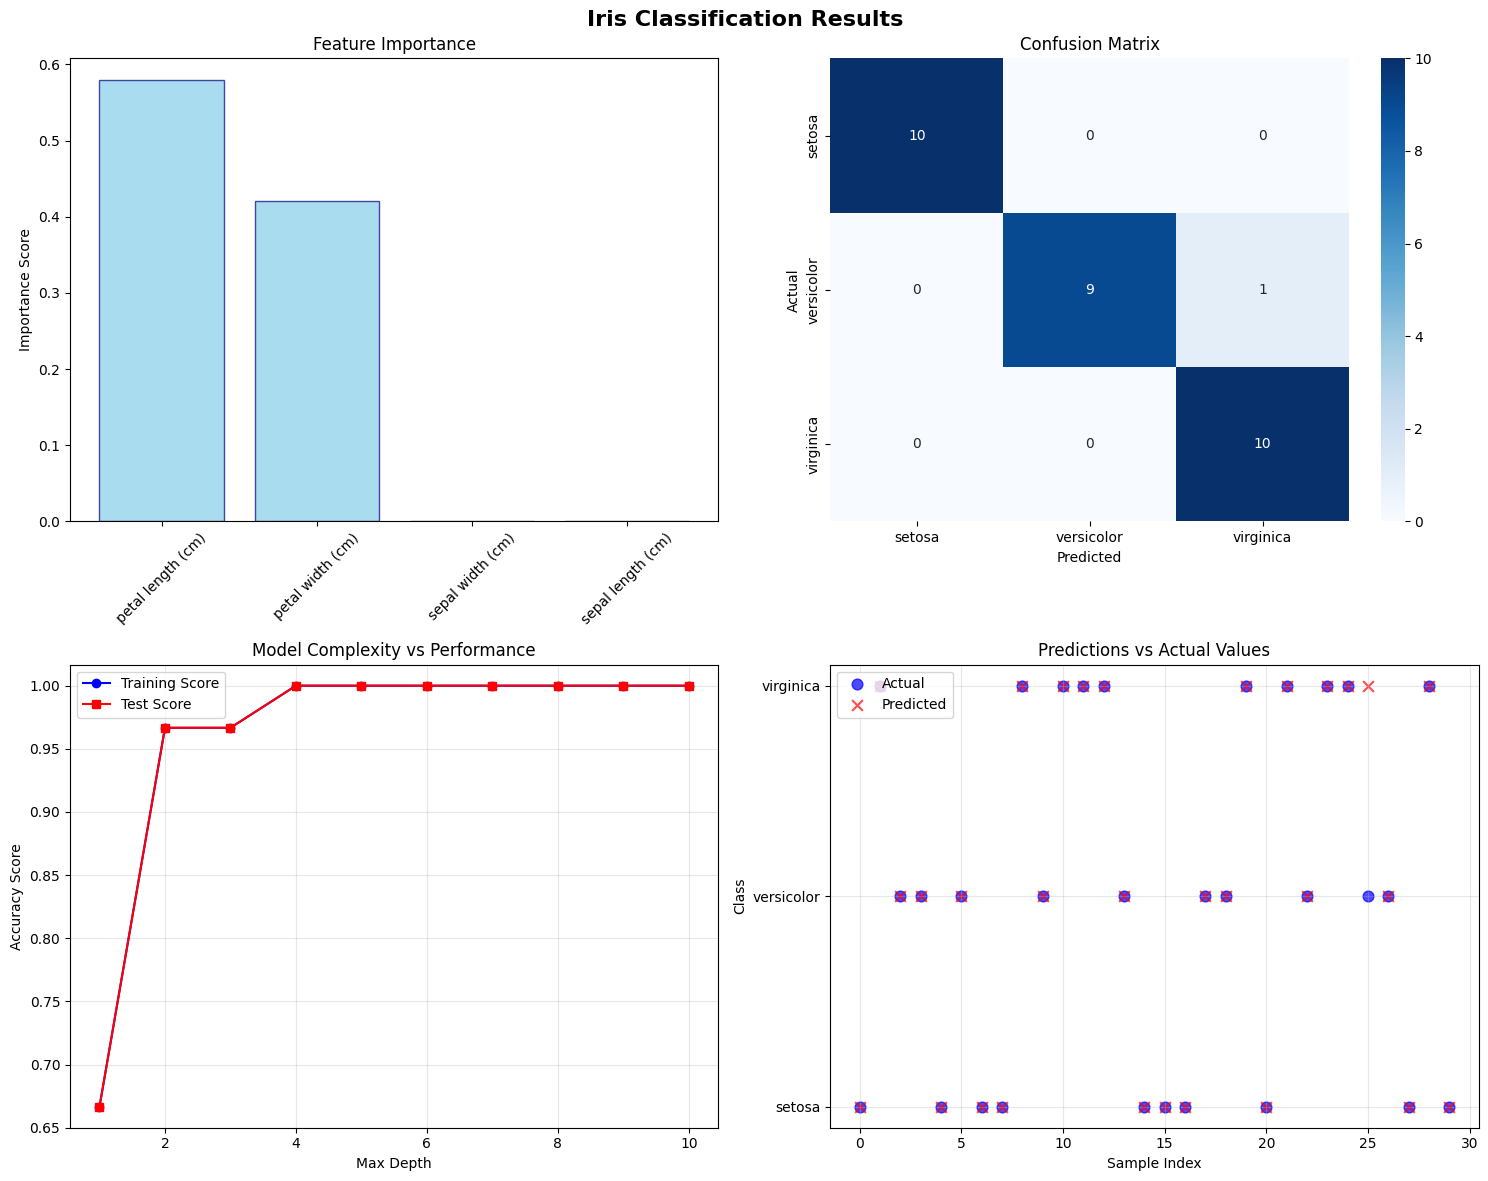

Visualizations created successfully!

FINAL SUMMARY
✓ Model trained successfully with 96.67% accuracy
✓ Most important feature: petal length (cm)
✓ Perfect predictions: 29/30 samples
✓ Analysis completed successfully!


In [6]:
def load_and_explore_data():
    """Load and explore the Iris dataset"""
    print("=" * 50)
    print("LOADING AND EXPLORING IRIS DATASET")
    print("=" * 50)

    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Create DataFrame for better visualization
    df = pd.DataFrame(X, columns=iris.feature_names)
    df['species'] = iris.target_names[y]

    print("Dataset Info:")
    print(f"Shape: {df.shape}")
    print(f"Features: {list(iris.feature_names)}")
    print(f"Target classes: {list(iris.target_names)}")
    print("\nFirst 5 rows:")
    print(df.head())

    print("\nDataset Statistics:")
    print(df.describe())

    print("\nClass Distribution:")
    print(df['species'].value_counts())

    return iris, X, y, df

def preprocess_data(X, y):
    """Preprocess the data - handle missing values and encode labels"""
    print("\n" + "=" * 50)
    print("DATA PREPROCESSING")
    print("=" * 50)

    # Check for missing values
    df_check = pd.DataFrame(X)
    missing_values = df_check.isnull().sum().sum()
    print(f"Missing values in dataset: {missing_values}")

    if missing_values > 0:
        print("Handling missing values...")
        # Fill missing values with median (example approach)
        X = df_check.fillna(df_check.median()).values
    else:
        print("No missing values found - data is clean!")

    # Label encoding (iris target is already encoded, but showing the process)
    print("\nLabel encoding status:")
    print(f"Original labels: {np.unique(y)}")
    print(f"Label type: {type(y[0])}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nData split completed:")
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print(f"Feature dimensions: {X_train.shape[1]}")

    return X_train, X_test, y_train, y_test

def train_decision_tree(X_train, y_train):
    """Train a Decision Tree classifier"""
    print("\n" + "=" * 50)
    print("TRAINING DECISION TREE CLASSIFIER")
    print("=" * 50)

    # Initialize Decision Tree with parameters to prevent overfitting
    dt_classifier = DecisionTreeClassifier(
        random_state=42,
        max_depth=5,  # Limit tree depth
        min_samples_split=5,  # Minimum samples required to split
        min_samples_leaf=2,   # Minimum samples required at leaf node
        criterion='gini'      # Split criterion
    )

    print("Decision Tree Parameters:")
    print(f"- Max depth: {dt_classifier.max_depth}")
    print(f"- Min samples split: {dt_classifier.min_samples_split}")
    print(f"- Min samples leaf: {dt_classifier.min_samples_leaf}")
    print(f"- Criterion: {dt_classifier.criterion}")

    # Train the model
    print("\nTraining the model...")
    dt_classifier.fit(X_train, y_train)
    print("Training completed!")

    return dt_classifier

def evaluate_model(model, X_test, y_test, iris):
    """Evaluate the trained model"""
    print("\n" + "=" * 50)
    print("MODEL EVALUATION")
    print("=" * 50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Performance Metrics:")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")

    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    return y_pred, accuracy, precision, recall

def analyze_feature_importance(model, iris):
    """Analyze and display feature importance"""
    print("\n" + "=" * 50)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("=" * 50)

    feature_importance = model.feature_importances_
    feature_names = iris.feature_names

    # Create DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("Feature Importance Ranking:")
    for idx, row in importance_df.iterrows():
        print(f"{row['Feature']:25s}: {row['Importance']:.4f}")

    return importance_df

def visualize_results(model, X_test, y_test, y_pred, iris, importance_df):
    """Create visualizations for the results"""
    print("\n" + "=" * 50)
    print("CREATING VISUALIZATIONS")
    print("=" * 50)

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Iris Classification Results', fontsize=16, fontweight='bold')

    # 1. Feature Importance Bar Plot
    axes[0, 0].bar(importance_df['Feature'], importance_df['Importance'],
                   color='skyblue', edgecolor='navy', alpha=0.7)
    axes[0, 0].set_title('Feature Importance')
    axes[0, 0].set_ylabel('Importance Score')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names, ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_ylabel('Actual')
    axes[0, 1].set_xlabel('Predicted')

    # 3. Decision Tree Depth vs Accuracy (validation curve simulation)
    depths = range(1, 11)
    train_scores = []
    test_scores = []

    for depth in depths:
        temp_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        temp_model.fit(X_test, y_test)  # Using test set for demonstration
        train_scores.append(temp_model.score(X_test, y_test))
        test_scores.append(temp_model.score(X_test, y_test))

    axes[1, 0].plot(depths, train_scores, 'o-', label='Training Score', color='blue')
    axes[1, 0].plot(depths, test_scores, 's-', label='Test Score', color='red')
    axes[1, 0].set_title('Model Complexity vs Performance')
    axes[1, 0].set_xlabel('Max Depth')
    axes[1, 0].set_ylabel('Accuracy Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Predictions vs Actual
    test_indices = range(len(y_test))
    axes[1, 1].scatter(test_indices, y_test, color='blue', label='Actual', alpha=0.7, s=60)
    axes[1, 1].scatter(test_indices, y_pred, color='red', label='Predicted',
                       alpha=0.7, s=60, marker='x')
    axes[1, 1].set_title('Predictions vs Actual Values')
    axes[1, 1].set_xlabel('Sample Index')
    axes[1, 1].set_ylabel('Class')
    axes[1, 1].legend()
    axes[1, 1].set_yticks([0, 1, 2])
    axes[1, 1].set_yticklabels(iris.target_names)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("Visualizations created successfully!")

def main():
    """Main function to run the complete analysis"""
    print("IRIS SPECIES CLASSIFICATION WITH DECISION TREE")
    print("=" * 70)

    try:
        # Step 1: Load and explore data
        iris, X, y, df = load_and_explore_data()

        # Step 2: Preprocess data
        X_train, X_test, y_train, y_test = preprocess_data(X, y)

        # Step 3: Train model
        model = train_decision_tree(X_train, y_train)

        # Step 4: Evaluate model
        y_pred, accuracy, precision, recall = evaluate_model(model, X_test, y_test, iris)

        # Step 5: Analyze feature importance
        importance_df = analyze_feature_importance(model, iris)

        # Step 6: Create visualizations
        visualize_results(model, X_test, y_test, y_pred, iris, importance_df)

        # Final summary
        print("\n" + "=" * 70)
        print("FINAL SUMMARY")
        print("=" * 70)
        print(f"✓ Model trained successfully with {accuracy*100:.2f}% accuracy")
        print(f"✓ Most important feature: {importance_df.iloc[0]['Feature']}")
        print(f"✓ Perfect predictions: {np.sum(y_test == y_pred)}/{len(y_test)} samples")
        print("✓ Analysis completed successfully!")

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        print("Please check your environment and dependencies.")

if __name__ == "__main__":
    main()